In [6]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [7]:
weather=pd.read_csv('dataset/daily_weather.csv')

In [8]:
weather.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [9]:
weather.head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


Check for null value

In [10]:
weather[weather.isnull().any(axis=1)]

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
16,16,917.890000,NaN,169.200000,2.192201,196.800000,2.930391,0.000,0.000000,48.990000,51.190000
111,111,915.290000,58.820000,182.600000,15.613841,189.000000,NaN,0.000,0.000000,21.500000,29.690000
177,177,915.900000,NaN,183.300000,4.719943,189.900000,5.346287,0.000,0.000000,29.260000,46.500000
262,262,923.596607,58.380598,47.737753,10.636273,67.145843,13.671423,0.000,NaN,17.990876,16.461685
277,277,920.480000,62.600000,194.400000,2.751436,NaN,3.869906,0.000,0.000000,52.580000,54.030000
334,334,916.230000,75.740000,149.100000,2.751436,187.500000,4.183078,NaN,1480.000000,31.880000,32.900000
358,358,917.440000,58.514000,55.100000,10.021491,NaN,12.705819,0.000,0.000000,13.880000,25.930000
361,361,920.444946,65.801845,49.823346,21.520177,61.886944,25.549112,NaN,40.364018,12.278715,7.618649
381,381,918.480000,66.542000,90.900000,3.467257,89.400000,4.406772,NaN,0.000000,20.640000,14.350000
409,409,NaN,67.853833,65.880616,4.328594,78.570923,5.216734,0.000,0.000000,18.487385,20.356594


# Data Cleaning

Delete the number because it doesnot make any difference as it was like S.NO

In [11]:
del weather['number']

In [12]:
weather.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


In [13]:
before_rows = weather.shape[0]
before_rows

1095

In [14]:
weather=weather.dropna()

In [15]:
weather.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


calculate the rows after the dletion of null values

In [16]:
after_rows= weather.shape[0]
after_rows

1064

In [17]:
before_rows - after_rows

31

Filter the value more then 24.99 consider as 1 in relative_humudity_3pm
1. First copy the data to temp
2. in the temp data last column value --> above 24.99 is consider as 1 
3. and move that data to the new label

In [18]:
temp_data=weather.copy()
temp_data['high_humidity_3pm']=(temp_data['relative_humidity_3pm']>24.99)*1
temp_data['high_humidity_3pm'].head()

0    1
1    0
2    0
3    0
4    1
Name: high_humidity_3pm, dtype: int32

In [19]:
temp_data.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm,high_humidity_3pm
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000,1
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597,0
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000,0
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547,0
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000,1


copy that temp_data to y for train and test set data

[[]] inner sq.bracket for label the column

In [20]:
y=temp_data[['high_humidity_3pm']].copy()
y.head()

,high_humidity_3pm
0,1
1,0
2,0
3,0
4,1


In [21]:
temp_data['relative_humidity_3pm'].head()

0    36.160000
1    19.426597
2    14.460000
3    12.742547
4    76.740000
Name: relative_humidity_3pm, dtype: float64

compare the above two cells for result

# 9am datas are important to predict the 3pm data i.e, Y dependent on X

store the 9am column datas in Morning_data except 3pm data

In [22]:
morning_features = ['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am']

In [23]:
x=temp_data[morning_features].copy()
x.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am'],
      dtype='object')

In [24]:
y.columns

Index(['high_humidity_3pm'], dtype='object')


# we separated the X and Y datas

# Now separate the training and testing data for  X and Y

By using train_test_split we have split the data into traing dataset and testing datasets.

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=324)

random_state is the combination of shuffle the rows i.e, possible shuffle order

In [26]:
x_train

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am
841,918.370000,72.932000,184.500000,2.013246,186.700000,2.773806,0.00,0.0,8.810000
75,920.100000,53.492000,186.100000,13.444009,193.800000,15.367778,0.00,0.0,31.470000
95,927.610000,54.896000,55.000000,4.988376,53.400000,7.202947,0.00,0.0,13.510000
895,919.235153,65.951112,194.343333,2.942019,216.569792,3.658810,0.00,0.0,14.073504
699,919.888128,68.687822,228.517730,3.960858,247.954028,5.185547,0.00,0.0,14.492839
...,...,...,...,...,...,...,...,...,...
276,917.010851,85.719360,116.258670,2.327022,49.729757,3.097945,0.00,0.0,15.668747
613,919.300000,39.956000,192.100000,1.409272,108.700000,2.192201,0.26,2770.0,83.810000
934,915.010000,60.602000,179.800000,6.352910,194.500000,7.672704,0.00,0.0,51.960000
777,916.500000,85.586000,121.100000,1.297425,80.600000,1.744813,0.00,0.0,15.920000


After the separation of x_train,x_test,y_train,y_test,

train the x_train, y_train (67%) data with any of the classifier(Decision tree) with max_leaf and random_state(shuffle the columns in the decision tree algorithm)

In [27]:
humudity_result=DecisionTreeClassifier(max_leaf_nodes=10,random_state=0)
humudity_result.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [28]:
type(humudity_result)

sklearn.tree._classes.DecisionTreeClassifier

Now we trained the model using decision tree 
and with the result(humudity_result) test the test data and calculate the accuracy

# Predict the test set

predict the X_test with humudity_result and store the result

In [29]:
y_predict=humudity_result.predict(x_test)

In [30]:
y_predict[:10]

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1])

In [31]:
y_test['high_humidity_3pm'][:10]

456     0
845     0
693     1
259     1
723     1
224     1
300     1
442     0
585     1
1057    1
Name: high_humidity_3pm, dtype: int32

# Measure the accuracy of the classifier

In [32]:
accuracy_score(y_test,y_predict)*100

90.05681818181817

<AxesSubplot:>

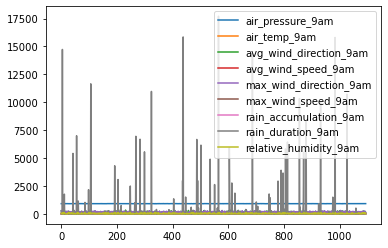

In [36]:
temp_data[morning_features].plot()

In [38]:
y_predict.plot()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'